# About Dataset
## Context
An anonymous salary survey has been conducted annually since 2015 among European IT specialists with a stronger focus on Germany. This year 1238 respondents volunteered to participate in the survey.<br>
The dataset contains rich information about the salary patterns among the IT professionals in the EU region and offers some great insights.<br>
An accompanying article - IT Salary Survey December 2020: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html has also been published which goes deeper into the findings.

In [82]:
import numpy as np
import pandas as pd
import scipy as  sp
import seaborn as sns
import missingno as msnimport 

import klib
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline

In [28]:
df_2018 = pd.read_csv('Data/IT_SalarySurveyEU2018.csv')
df_2019 = pd.read_csv('Data/IT_SalarySurveyEU2019.csv')
df_2020 = pd.read_csv('Data/IT_SalarySurveyEU2020.csv')

# Exploratory Data Analysis

In [3]:
df_2018.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer


In [90]:
df_2019.head()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN


In [93]:
df_2020.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [94]:
print (df_2018.shape)
print (df_2019.shape)
print (df_2020.shape)

(765, 14)
(991, 23)
(1253, 23)


In [24]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           765 non-null    object 
 1   Age                                 672 non-null    float64
 2   Gender                              751 non-null    object 
 3   City                                736 non-null    object 
 4   Position                            737 non-null    object 
 5   Years of experience                 732 non-null    float64
 6   Your level                          743 non-null    object 
 7   Current Salary                      750 non-null    float64
 8   Salary one year ago                 596 non-null    float64
 9   Salary two years ago                463 non-null    float64
 10  Are you getting any Stock Options?  742 non-null    object 
 11  Main language at work               750 non-n

In [49]:
#Checking column names
df_2018.columns.values

array(['Timestamp', 'Age', 'Gender', 'City', 'Position',
       'Years of experience', 'Your level', 'Current Salary',
       'Salary one year ago', 'Salary two years ago',
       'Are you getting any Stock Options?', 'Main language at work',
       'Company size', 'Company type'], dtype=object)

In [95]:
df_2019.columns.values

array(['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
       'Position (without seniority)', 'Years of experience',
       'Your main technology / programming language',
       'Yearly brutto salary (without bonus and stocks)', 'Yearly bonus',
       'Yearly stocks',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Number of home office days per month',
       'Main language at work', 'Company name ', 'Company size',
       'Company type', 'Сontract duration', 'Company business sector',
       '0'], dtype=object)

In [96]:
df_2020.columns.values

array(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status',
       'Сontract duration', 'Main language at work', 'Company size',
       'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how muc

In [48]:
#Checking for null values
df_2018.isnull().sum()

Timestamp                               0
Age                                    93
Gender                                 14
City                                   29
Position                               28
Years of experience                    33
Your level                             22
Current Salary                         15
Salary one year ago                   169
Salary two years ago                  302
Are you getting any Stock Options?     23
Main language at work                  15
Company size                           15
Company type                           35
dtype: int64

<Axes: >

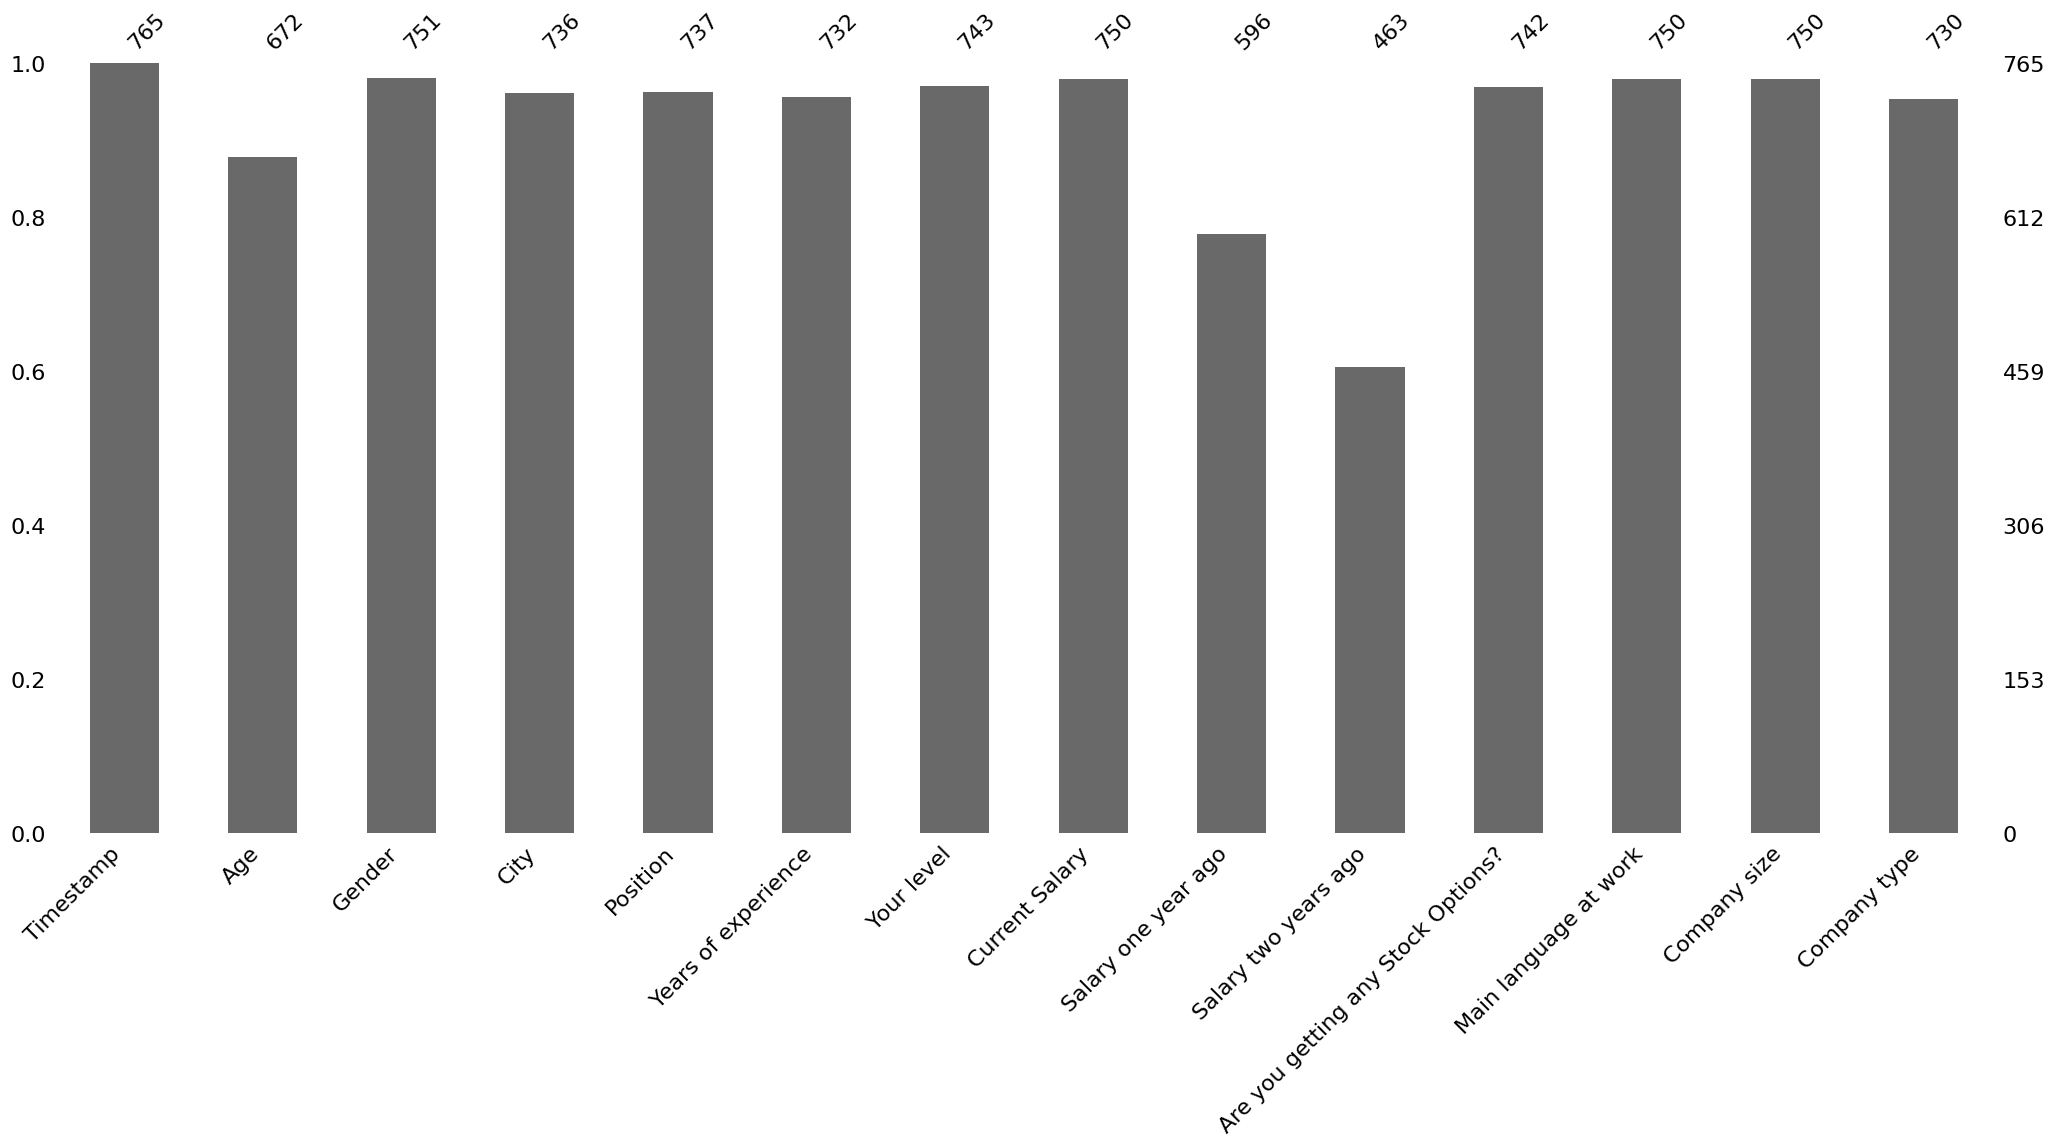

In [50]:
#Plotting the missing values
msno.bar(df_2018)

Interpretation

On the left side of the plot, the y-axis scale ranges from 0.0 to 1.0, where 1.0 represents 100% data completeness. If the bar is less than this, it indicates that we have missing values within that column.

On the right side of the plot, the scale is measured in index values. With the top right representing the maximum number of rows within the dataframe.

Along the top of the plot, there are a series of numbers that represent the total count of the non-null values within that column.

In [97]:
df_2019.isnull().sum()

Zeitstempel                                                                                               0
Age                                                                                                     109
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                          15
Position (without seniority)                                                                              1
Years of experience                                                                                       0
Your main technology / programming language                                                              14
Yearly brutto salary (without bonus and stocks)                                                           1
Yearly bonus                

<Axes: >

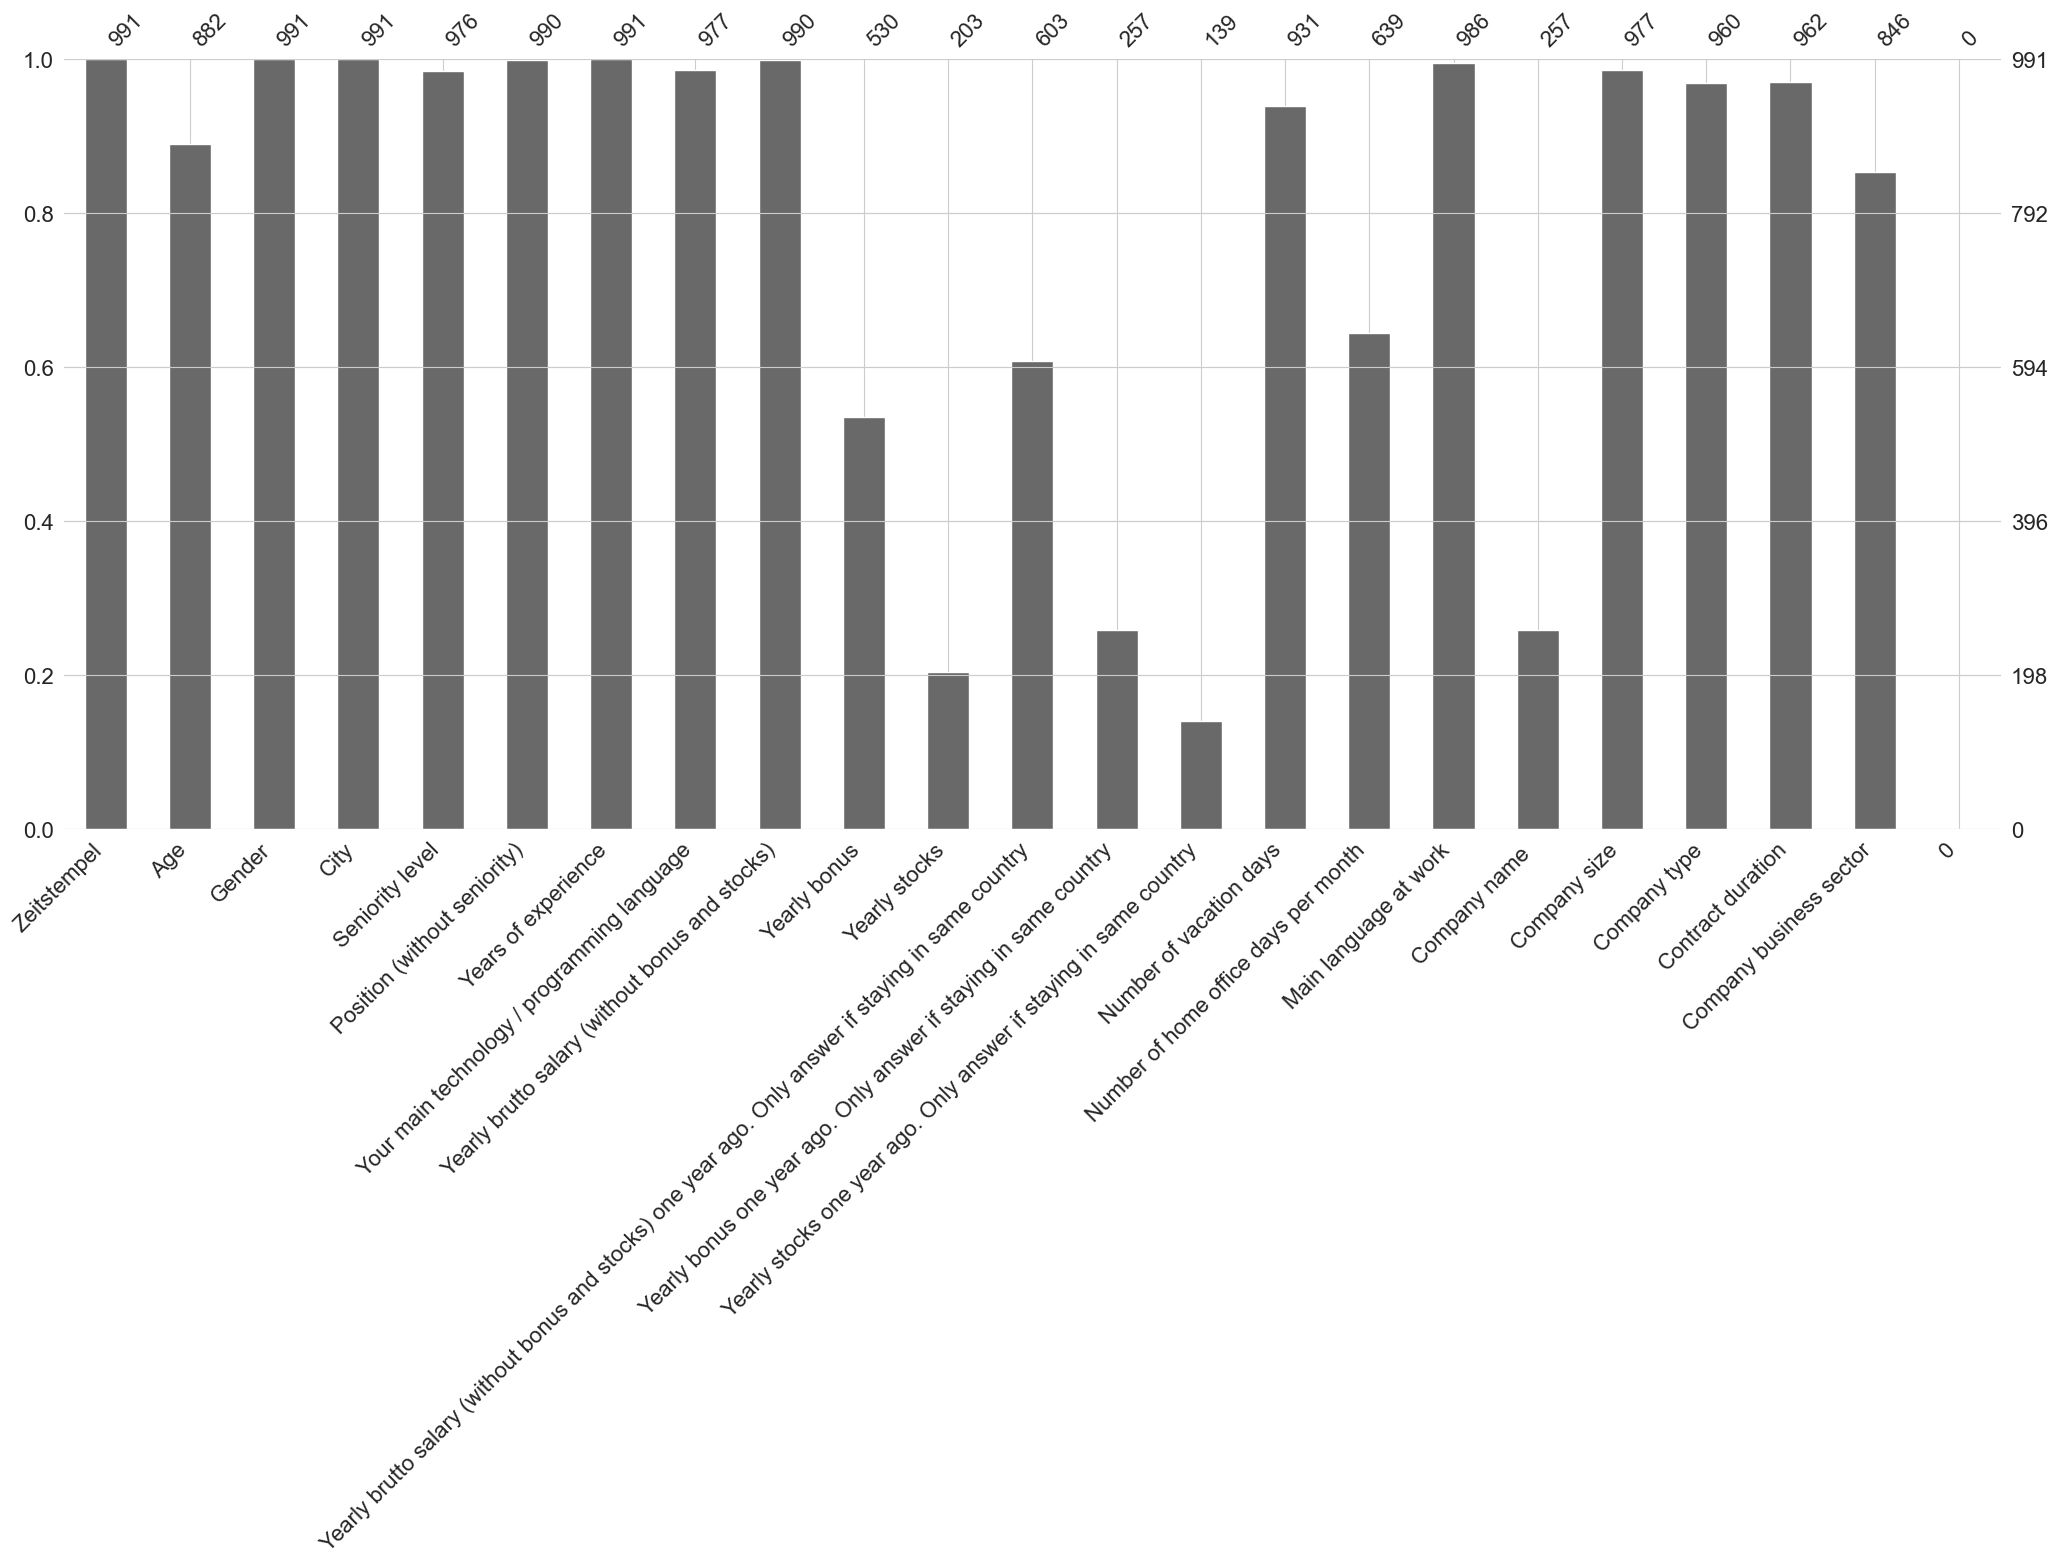

In [101]:
msno.bar(df_2019)

In [99]:
df_2020.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

<Axes: >

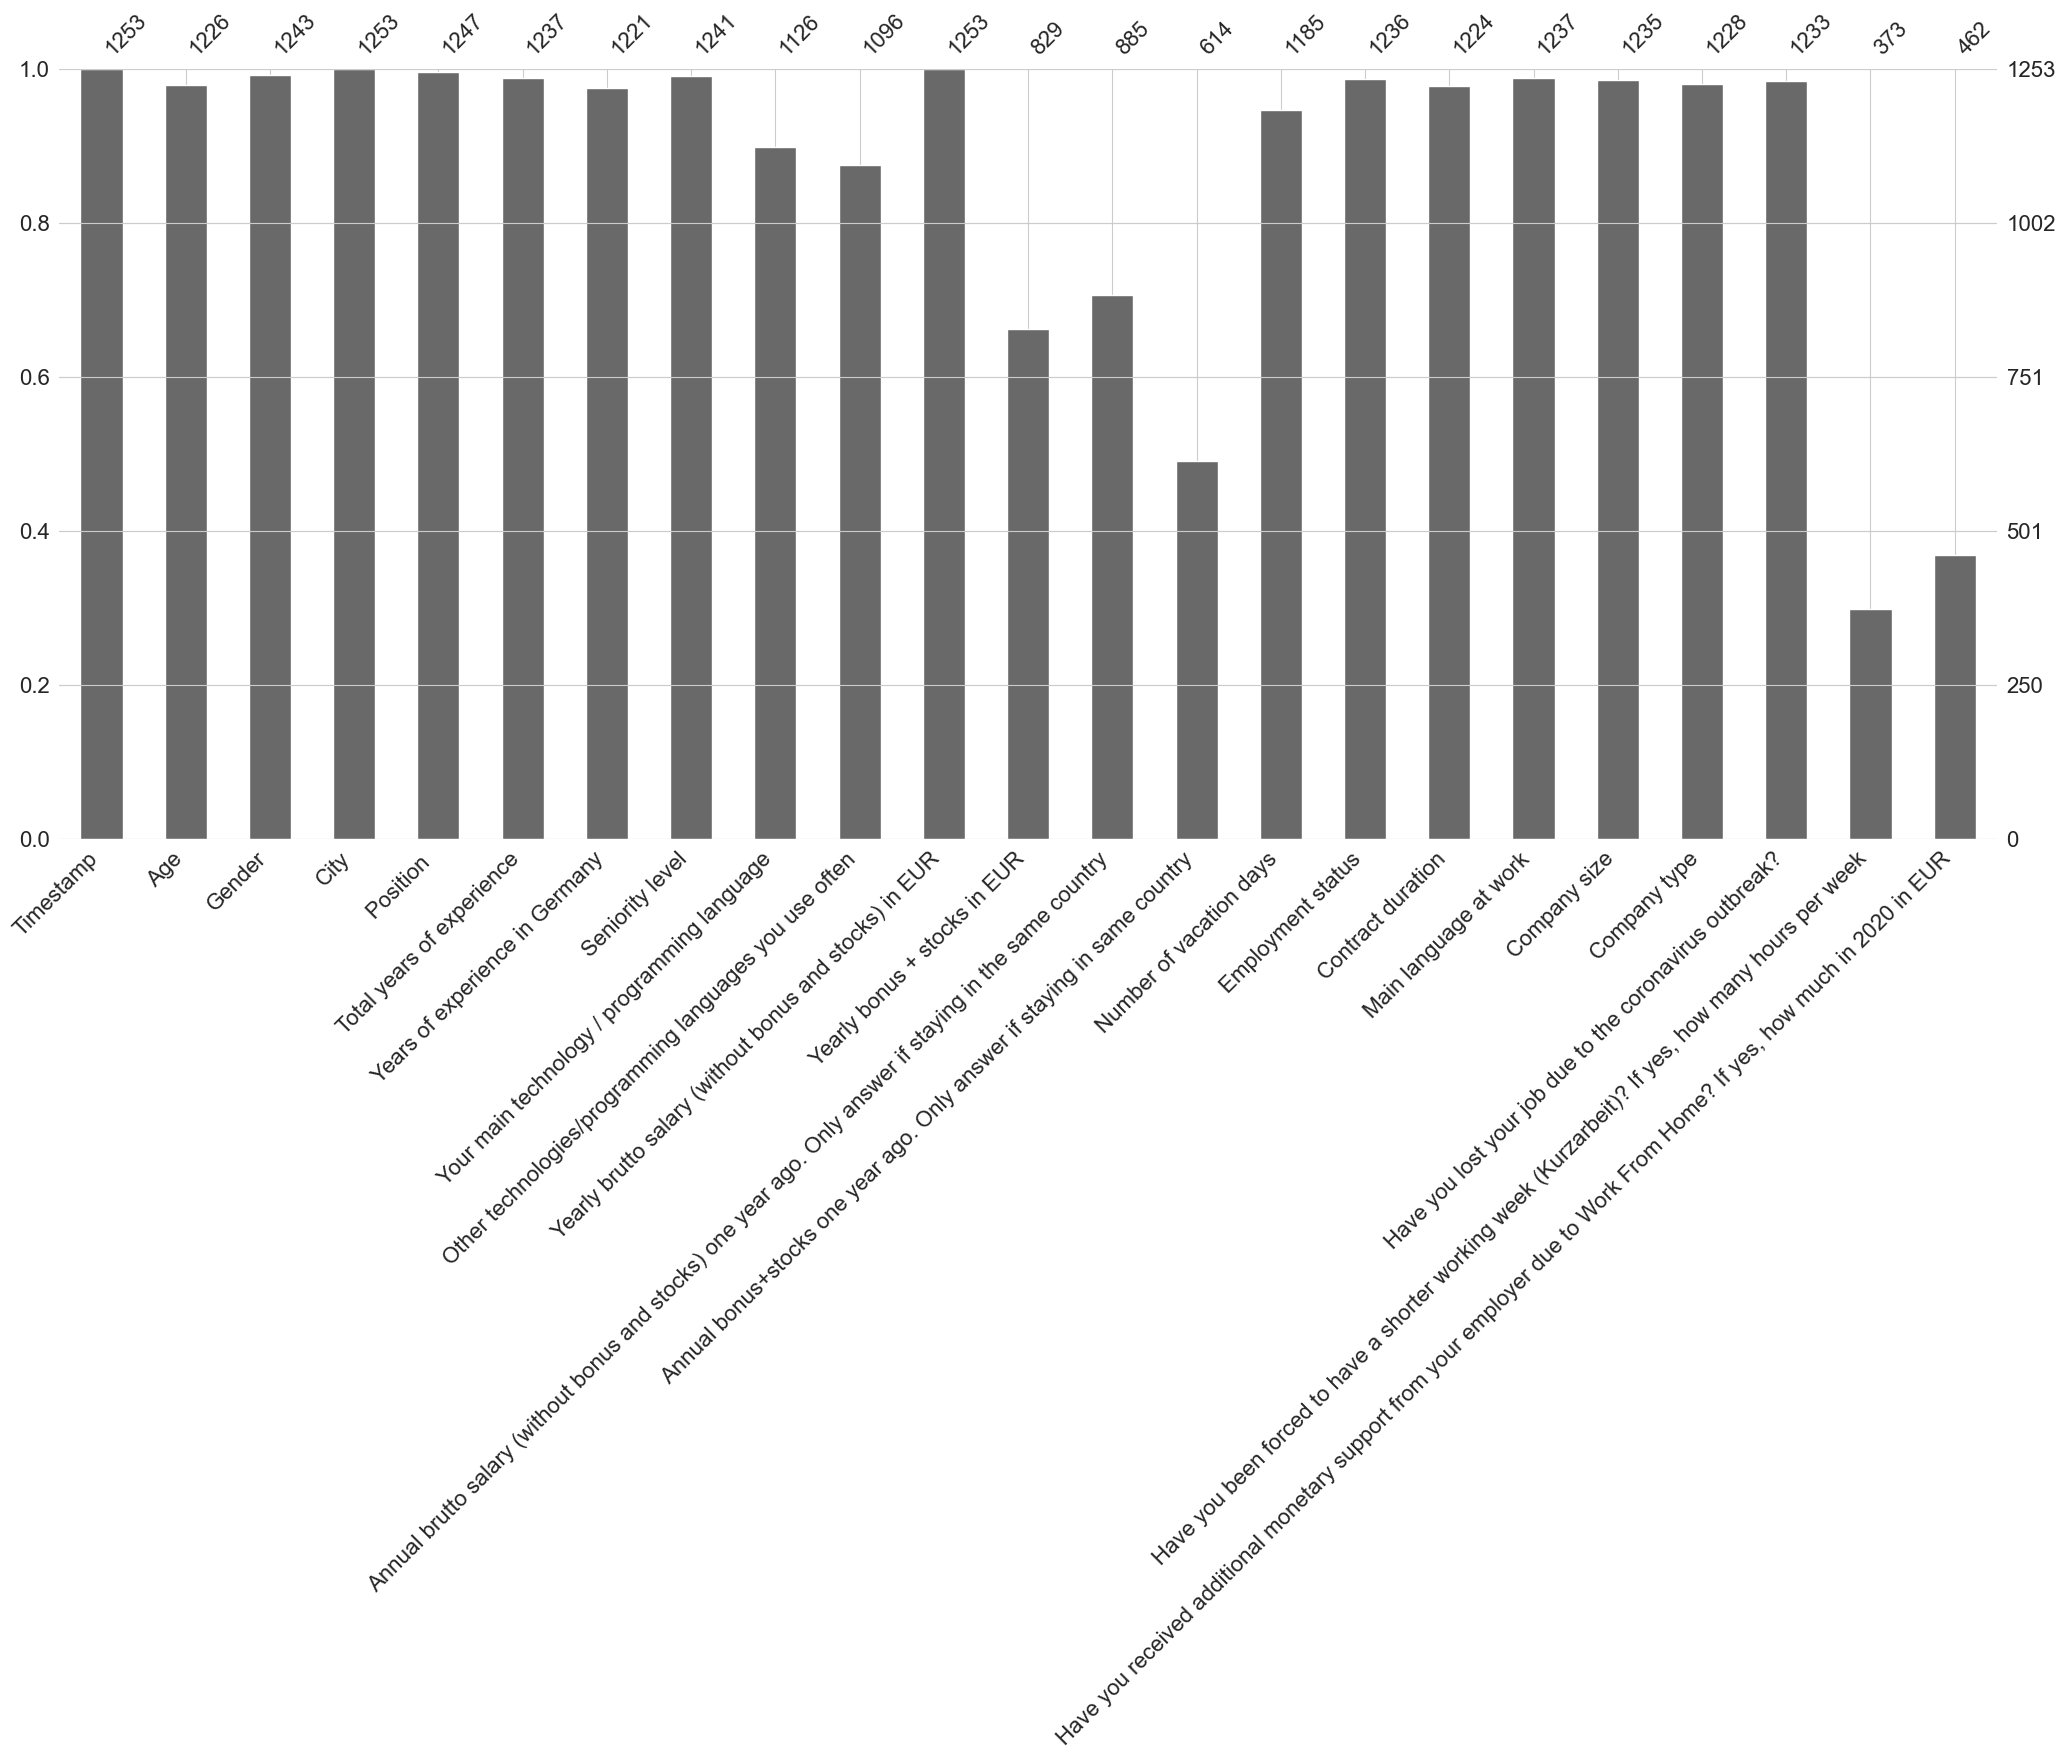

In [100]:
msno.bar(df_2020)

<Axes: >

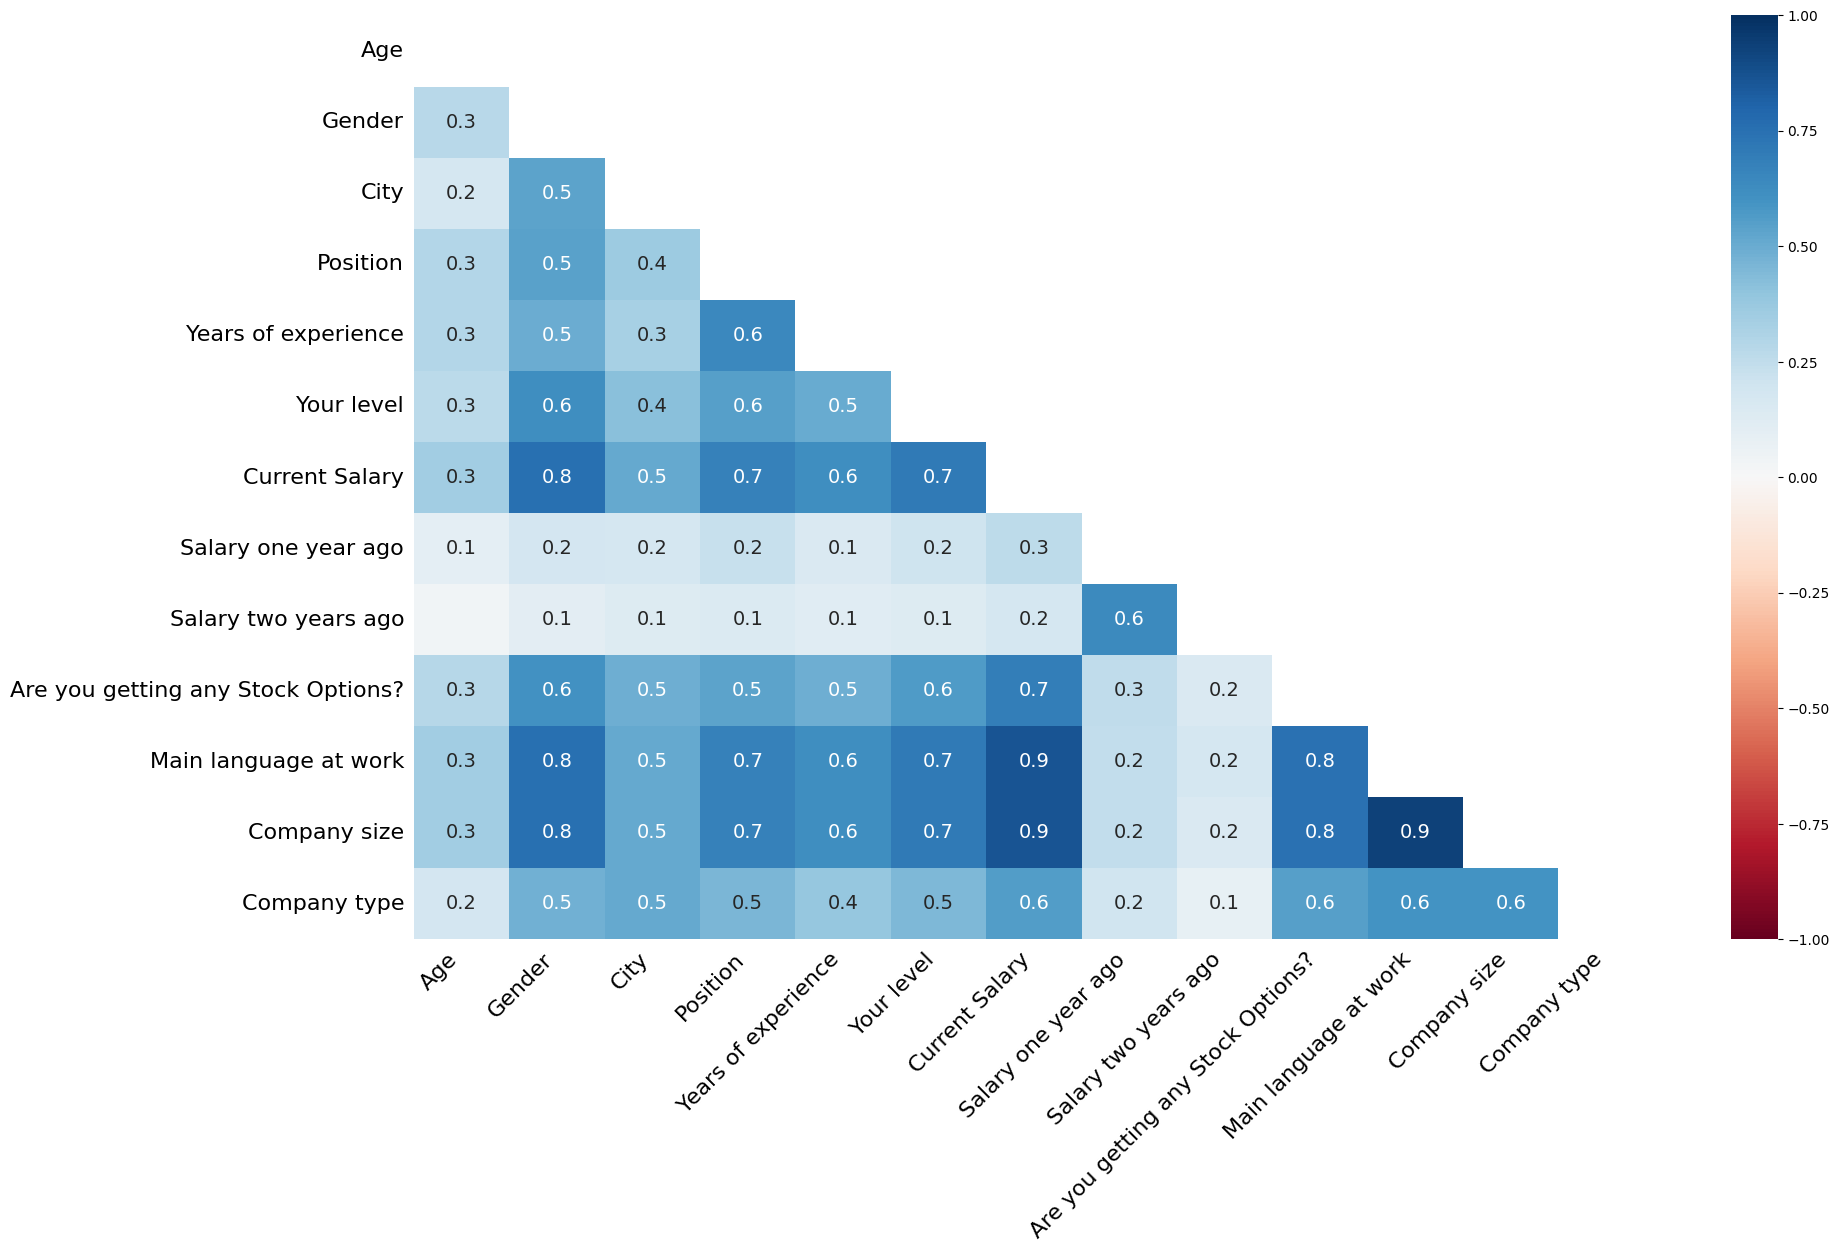

In [51]:
#Missing values heatmap
msno.heatmap(df_2018)

<Axes: >

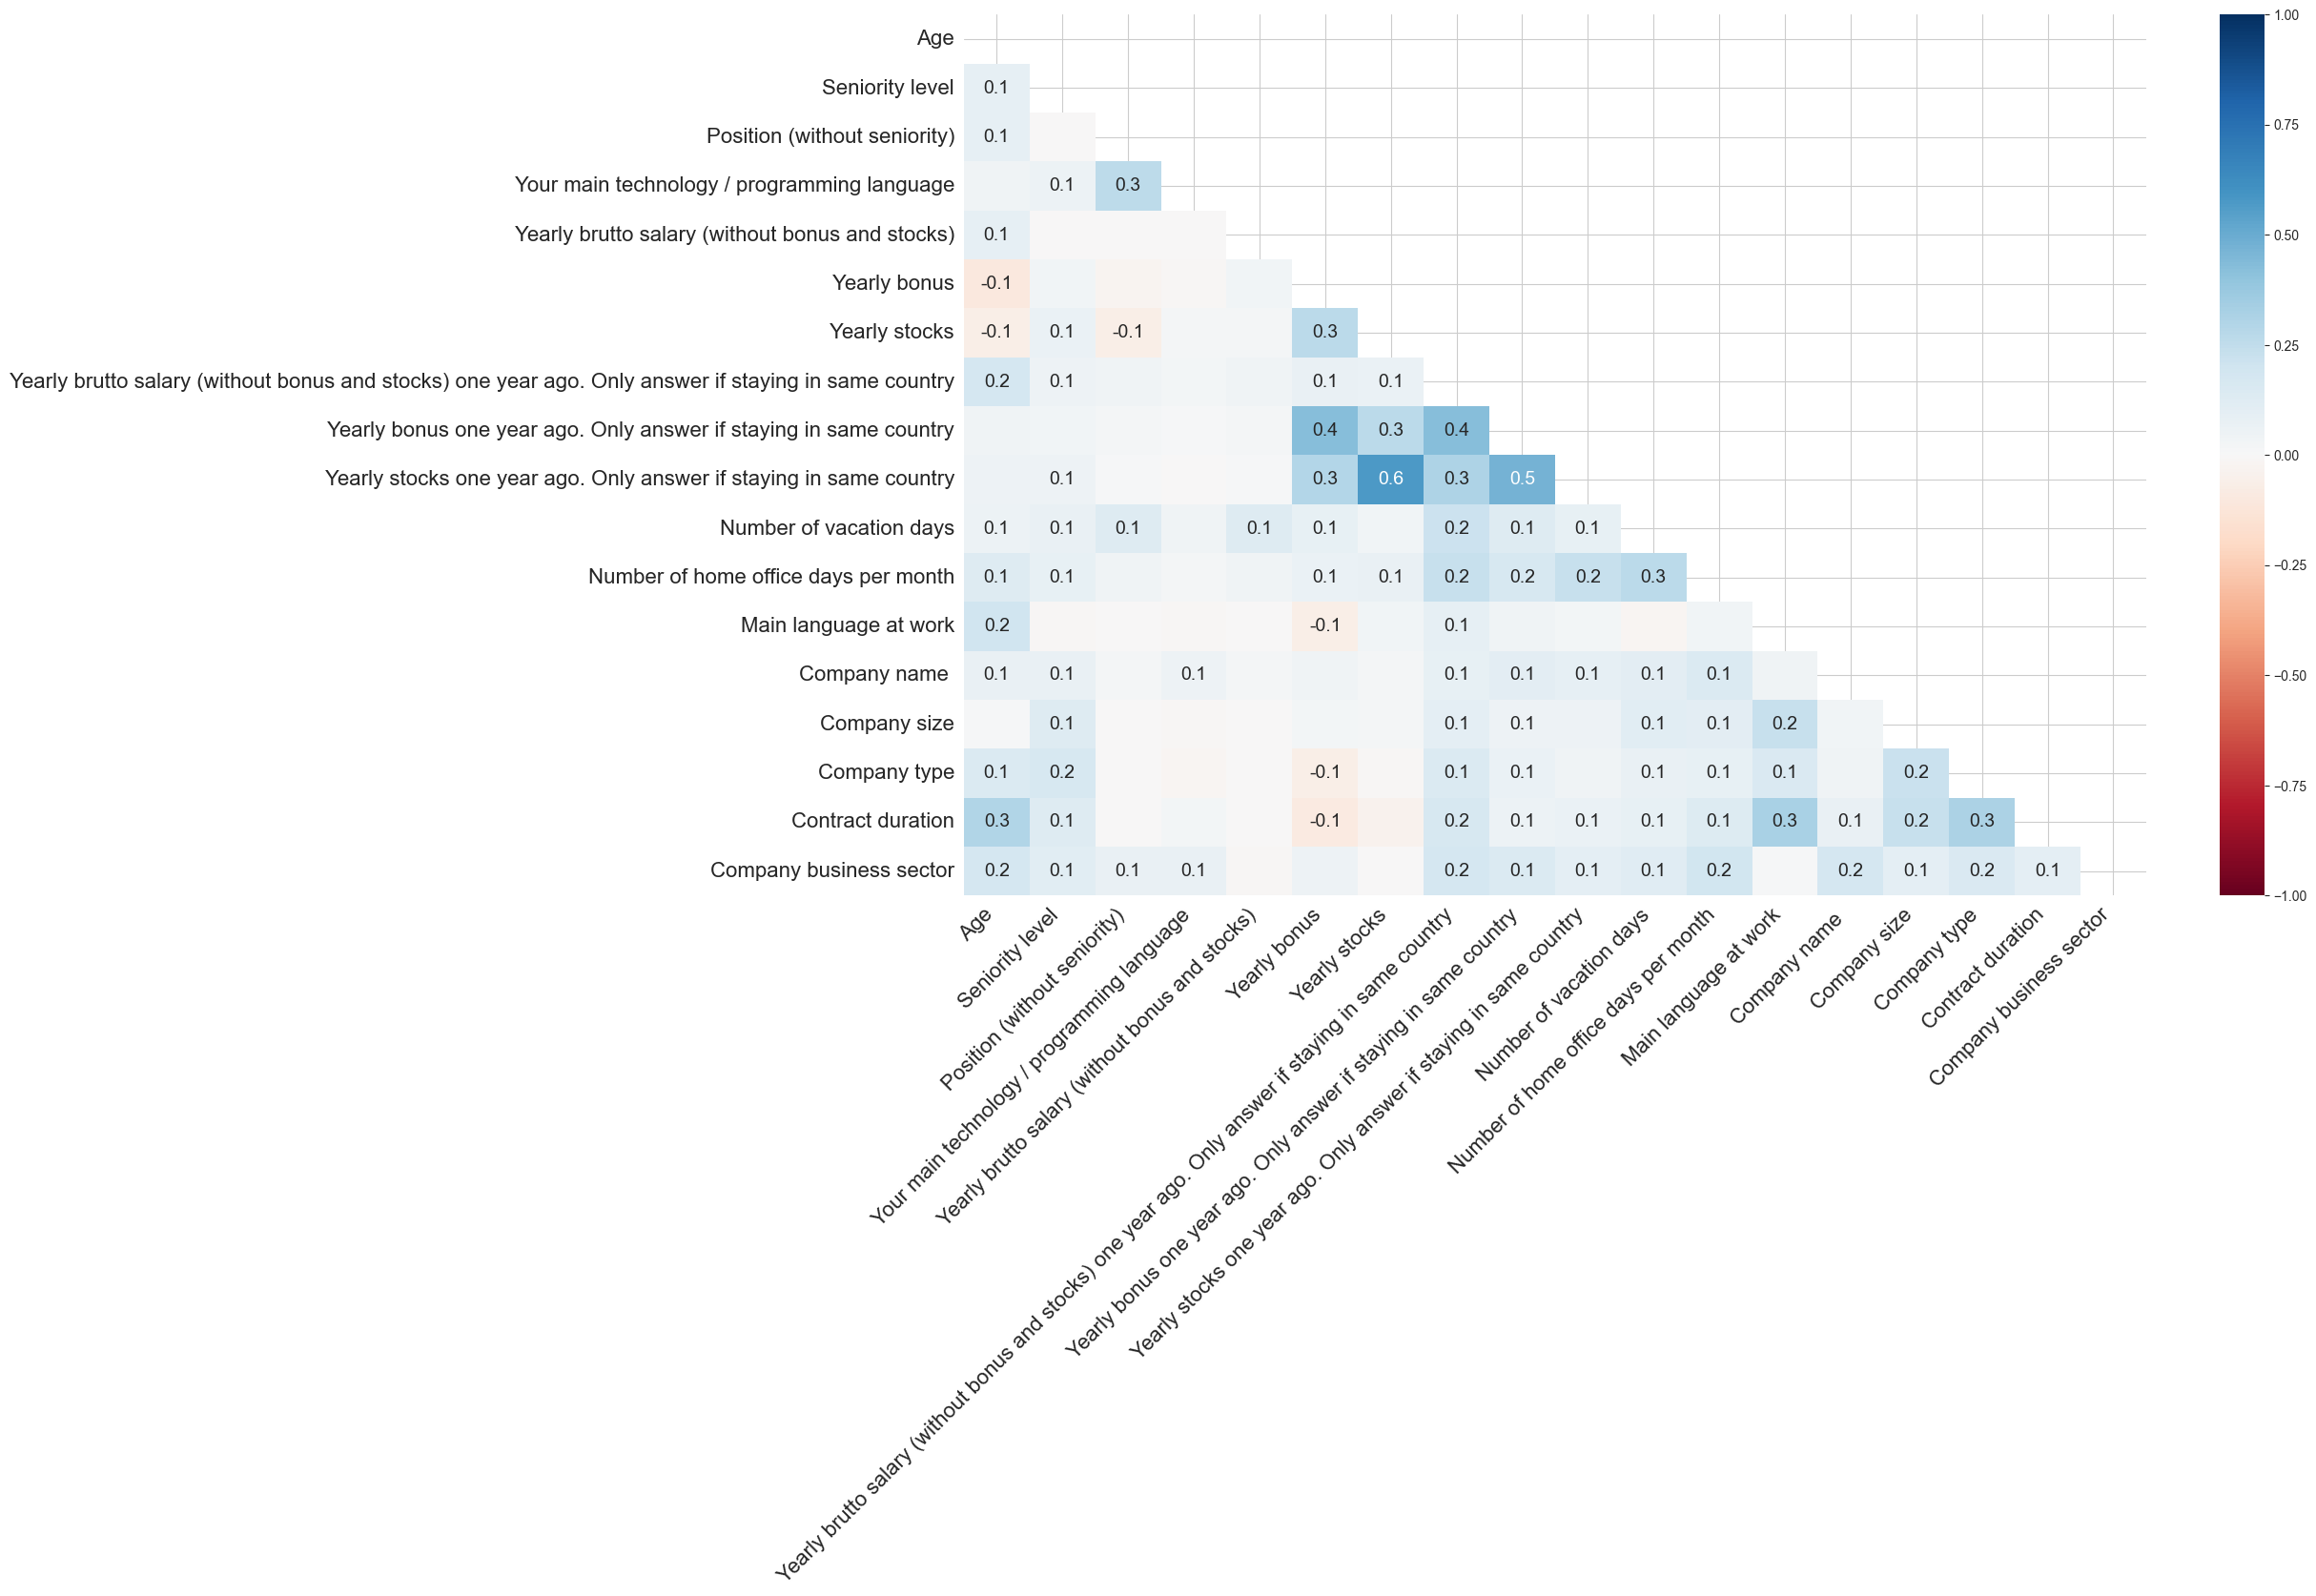

In [102]:
#Missing values heatmap
msno.heatmap(df_2019)

<Axes: >

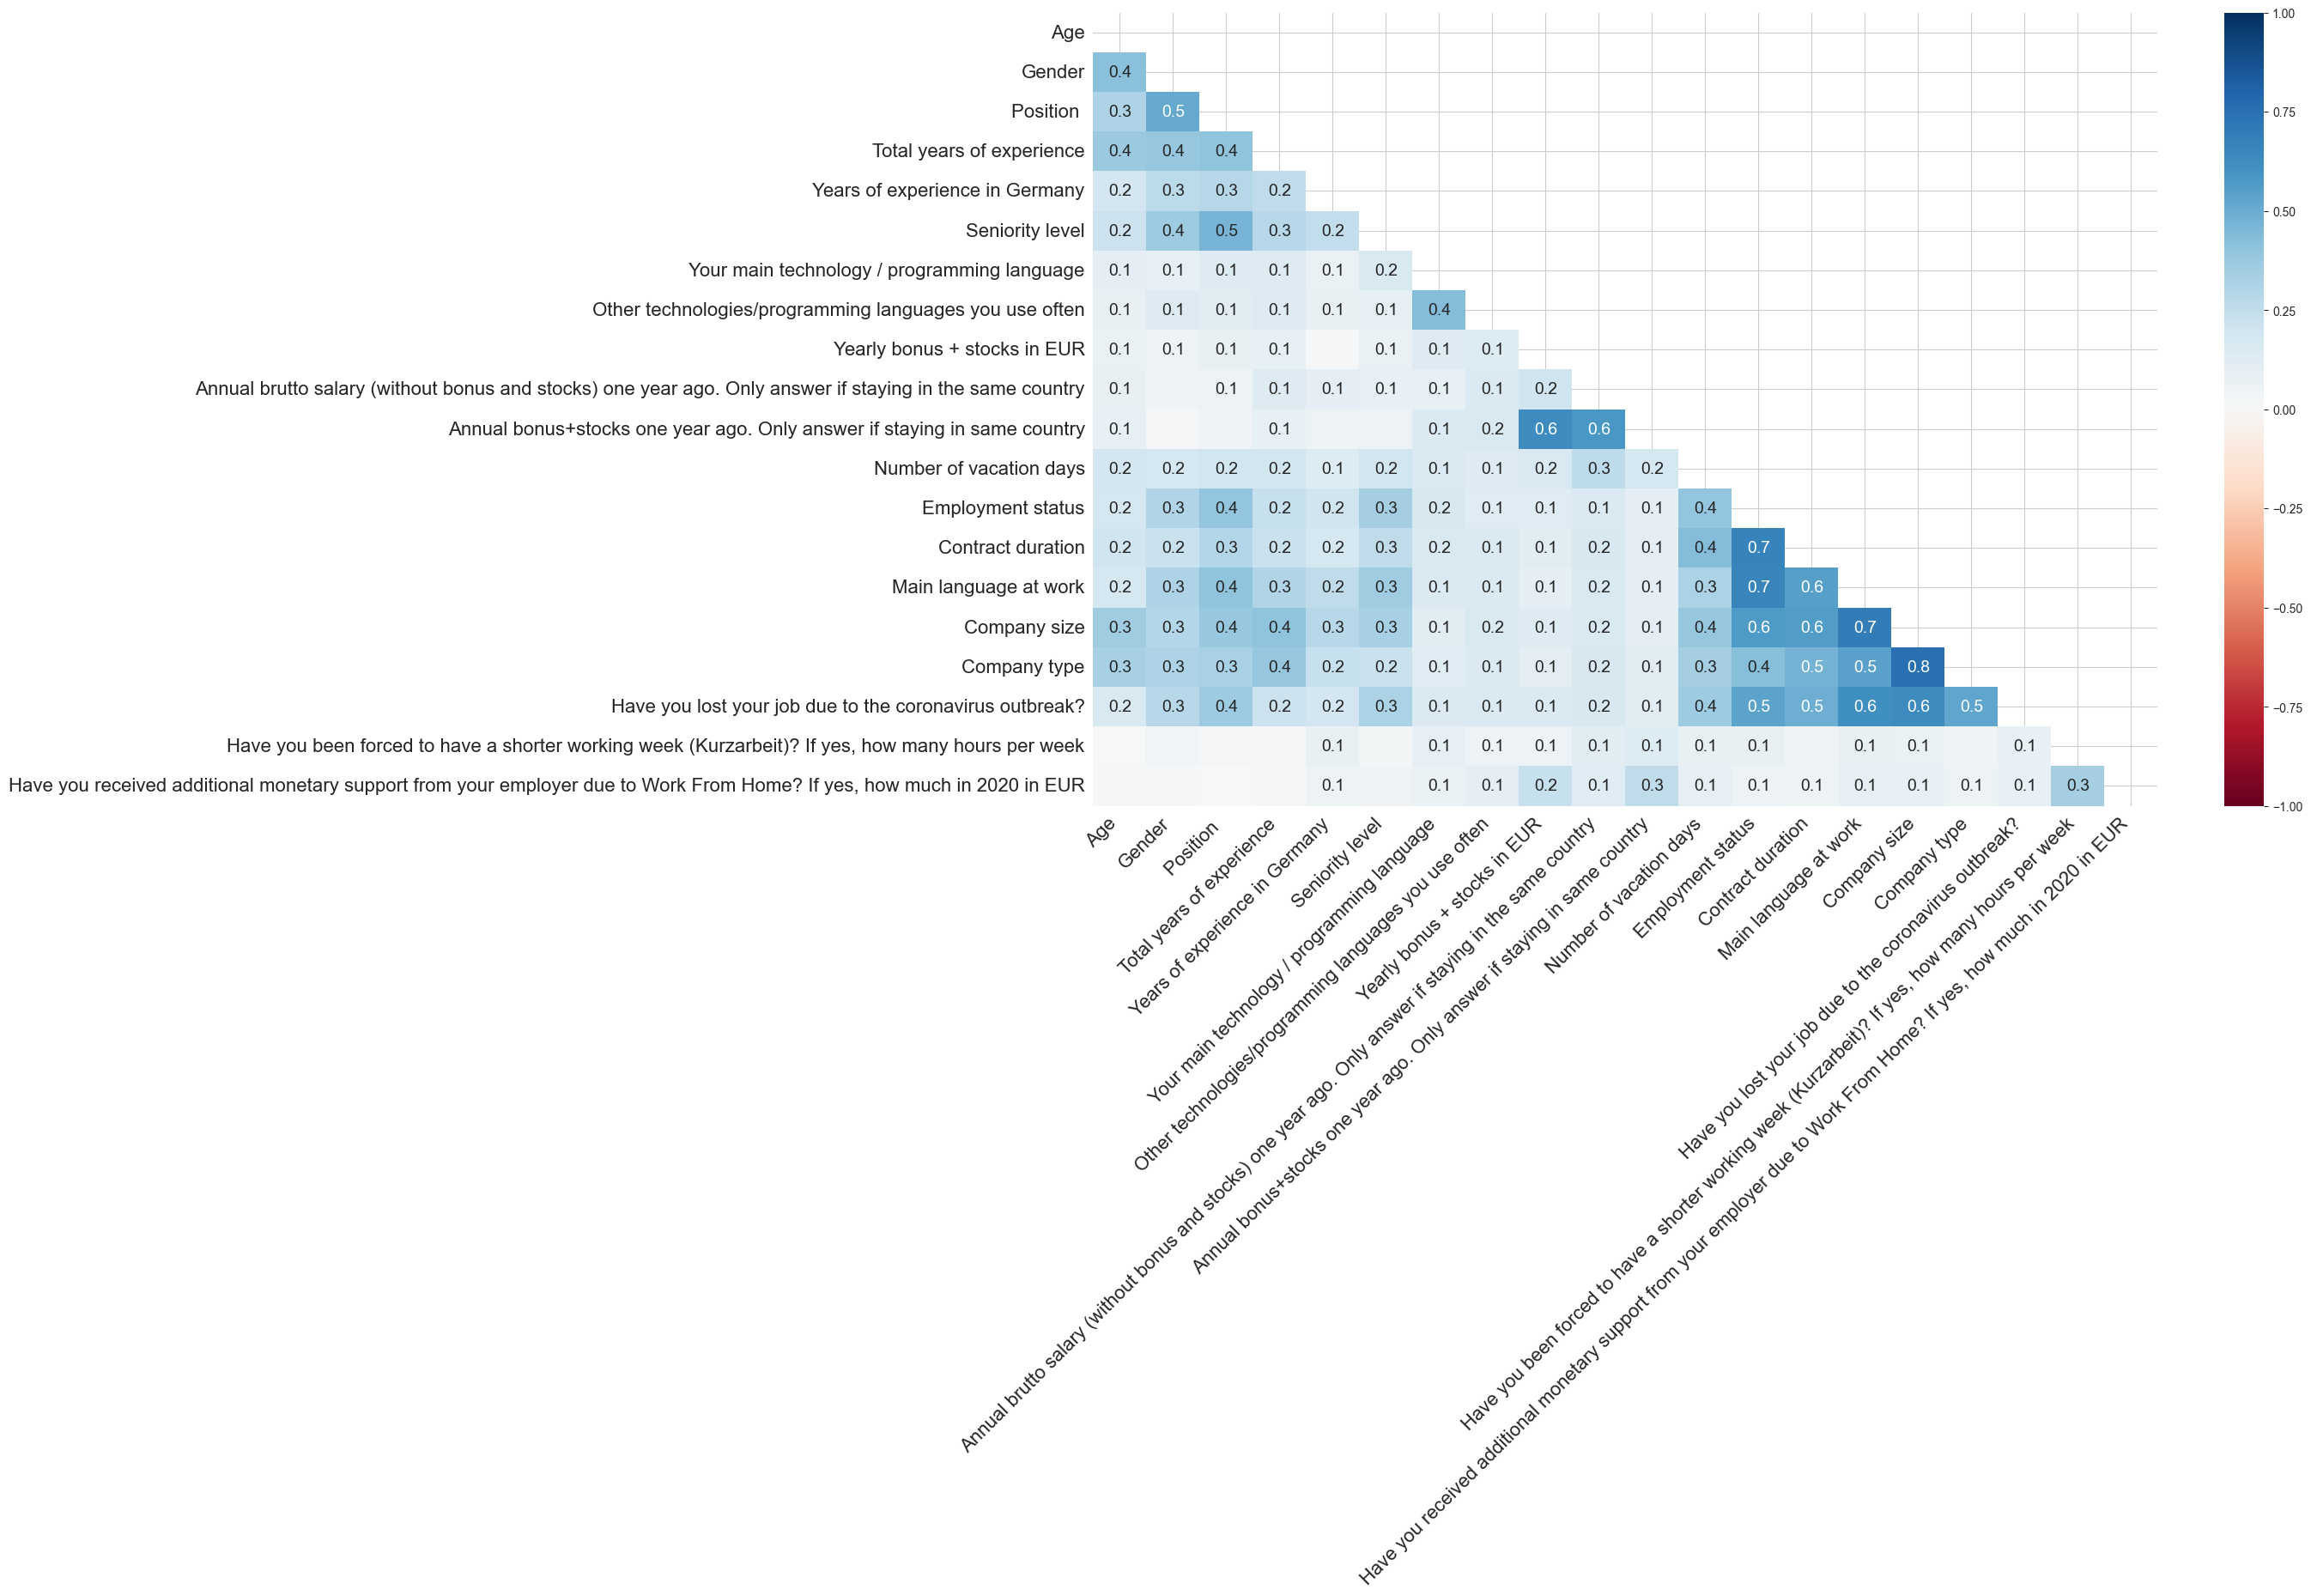

In [103]:
#Missing values heatmap
msno.heatmap(df_2020)

In [52]:
#Checking the statistics
df_2018.describe()

,Age,Years of experience,Current Salary,Salary one year ago,Salary two years ago
count,672.000000,732.000000,750.000000,596.000000,463.000000
mean,32.183036,8.548497,68381.765333,62187.278523,58013.475162
std,5.107268,4.729557,21196.306557,20163.008663,20413.048908
min,21.000000,0.000000,10300.000000,10001.000000,10001.000000
25%,29.000000,5.000000,57000.000000,52000.000000,48000.000000
50%,32.000000,8.000000,65000.000000,60000.000000,56000.000000
75%,35.000000,11.000000,75000.000000,70000.000000,67000.000000
max,60.000000,38.000000,200000.000000,200000.000000,150000.000000


In [107]:
#Skimming the data
from skimpy import skim
skim(df_2018)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 765    │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 14     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA   ┃ NA %   ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ Age                      │   93 │     12 │      32 │    5.1 │     21 │     29 │     35 │      60 │  ▂█▄▁   │  │
│ │ Years of experience      │   33 │    4.3 │     8.5 │    4.7 │      0 │      5 │     11 │      38 │  ▆█▂▁   │  │
│ │ Current Salary           │   15 │      2 │   68000 │  21000 │  10000 │  57000 │  75000 │  200000 │  ▁█▃▁   │  │
│ │ Salary one year ago      │  170 │     22 │   62000 │  20000 │  10000 │  52000 │  70000 │  200000 │   ▁█▂   │  │
│ │ Salary two years ago     │  300 │     39 │   58000 │  20000 │  10000 │  48000 │  67000 │  150000 │  ▁█▇▁   │  │
│ └──────────────────────────┴──────┴────────┴─────────┴────────┴────────┴────────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Timestamp                             │     0 │         0 │                        2 │                1500 │  │
│ │ Gender                                │    14 │       1.8 │                        2 │                1500 │  │
│ │ City                                  │    29 │       3.8 │                        2 │                1500 │  │
│ │ Position                              │    28 │       3.7 │                        2 │                1500 │  │
│ │ Your level                            │    22 │       2.9 │                        2 │                1500 │  │
│ │ Are you getting any                   │    23 │         3 │                        2 │                1500 │  │
│ │ Main language at wor                  │    15 │         2 │                        2 │                1500 │  │
│ │ Company size                          │    15 │         2 │                        2 │                1500 │  │
│ │ Company type                          │    35 │       4.6 │                        2 │                1500 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [105]:
df_2019.describe()

,Age,Years of experience,Yearly brutto salary (without bonus and stocks),Yearly bonus,Yearly stocks,Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Yearly bonus one year ago. Only answer if staying in same country,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,0
count,882.000000,991.000000,990.000000,530.000000,203.000000,603.000000,257.000000,139.000000,931.000000,639.000000,0.0
mean,32.416100,8.529768,72562.212121,7857.169811,18263.119803,65803.895522,8144.000000,8204.476331,27.924812,6.462050,NaN
std,5.262496,5.036320,23947.379182,10320.628344,61012.387773,20554.017614,15067.876701,45224.397374,4.482911,15.384601,NaN
min,20.000000,0.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,NaN
25%,29.000000,5.000000,60000.000000,300.000000,1.000000,55000.000000,1000.000000,0.000000,26.000000,2.000000,NaN
50%,32.000000,8.000000,70000.000000,5000.000000,2000.000000,65000.000000,5000.000000,0.100000,28.000000,4.000000,NaN
75%,35.000000,11.000000,80000.000000,10000.000000,20000.000000,75000.000000,9000.000000,3000.000000,30.000000,7.000000,NaN
max,54.000000,30.000000,216000.000000,80000.000000,750000.000000,200000.000000,150000.000000,520000.000000,100.000000,365.000000,NaN


In [109]:
skim(df_2019)

c:\Users\gitom\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning:

invalid value encountered in divide



╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 991    │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 23     │ │ float64     │ 10    │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA   ┃ NA %   ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ Age                       │  110 │     11 │      32 │    5.3 │    20 │     29 │     35 │      54 │  ▂█▇▃▁  │  │
│ │ Years of experience       │    0 │      0 │     8.5 │      5 │     0 │      5 │     11 │      30 │  ▅█▆▂▁  │  │
│ │ Yearly brutto salary      │    1 │    0.1 │   73000 │  24000 │  6000 │  60000 │  80000 │  220000 │  ▁█▃▁   │  │
│ │ Yearly bonus              │  460 │     47 │    7900 │  10000 │     0 │    300 │  10000 │   80000 │   █▁    │  │
│ │ Yearly stocks             │  790 │     80 │   18000 │  61000 │     0 │      1 │  20000 │  750000 │    █    │  │
│ │ Yearly brutto salary      │  390 │     39 │   66000 │  21000 │     0 │  55000 │  75000 │  200000 │  ▁█▅▁   │  │
│ │ Yearly bonus one yea      │  730 │     74 │    8100 │  15000 │     0 │   1000 │   9000 │  150000 │    █    │  │
│ │ Yearly stocks one ye      │  850 │     86 │    8200 │  45000 │     0 │      0 │   3000 │  520000 │    █    │  │
│ │ Number of vacation d      │   60 │    6.1 │      28 │    4.5 │     4 │     26 │     30 │     100 │    █    │  │
│ │ Number of home offic      │  350 │     36 │     6.5 │     15 │     0 │      2 │      7 │     360 │    █    │  │
│ │ 0                         │  990 │    100 │     nan │    nan │   nan │    nan │    nan │     nan │         │  │
│ └───────────────────────────┴──────┴────────┴─────────┴────────┴───────┴────────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA      ┃ NA %      ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Zeitstempel                          │       0 │         0 │                       2 │                2000 │  │
│ │ Gender                               │       0 │         0 │                       2 │                2000 │  │
│ │ City                                 │       0 │         0 │                       2 │                2000 │  │
│ │ Seniority level                      │      15 │       1.5 │                       2 │                2000 │  │
│ │ Position (without se                 │       1 │       0.1 │                       2 │                2000 │  │
│ │ Your main technology                 │      14 │    

In [110]:
df_2020.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


In [111]:
skim(df_2020)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1253   │ │ string      │ 19    │                                                          │
│ │ Number of columns │ 23     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA % ┃ mean     ┃ sd         ┃ p0    ┃ p25   ┃ p75   ┃ p100         ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Age                   │  27 │  2.2 │       33 │        5.7 │    20 │    29 │    35 │           69 │  ▃█▂   │  │
│ │ Yearly brutto salary  │   0 │    0 │ 80000000 │ 2800000000 │ 10000 │ 59000 │ 80000 │ 100000000000 │   █    │  │
│ │ Annual brutto salary  │ 370 │   29 │   630000 │   17000000 │ 11000 │ 55000 │ 75000 │    500000000 │   █    │  │
│ │ Have you been forced  │ 880 │   70 │       13 │         15 │     0 │     0 │    30 │           40 │ █▁ ▂▃▂ │  │
│ └───────────────────────┴─────┴──────┴──────────┴────────────┴───────┴───────┴───────┴──────────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA      ┃ NA %      ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Timestamp                            │       0 │         0 │                       2 │                2500 │  │
│ │ Gender                               │      10 │       0.8 │                       2 │                2500 │  │
│ │ City                                 │       0 │         0 │                       2 │                2500 │  │
│ │ Position                             │       6 │      0.48 │                       2 │                2500 │  │
│ │ Total years of exper                 │      16 │       1.3 │                       2 │                2500 │  │
│ │ Years of experience                  │      32 │       2.6 │                       2 │                2500 │  │
│ │ Seniority level                      │      12 │      0.96 │                       2 │                2500 │  │
│ │ Your main technology                 │     130 │        10 │                       2 │                2500 │  │
│ │ Other technologies/p                 │     160 │        13 │                       2 │                2500 │  │
│ │ Yearly bonus + stock                 │     420 │        34 │                       2 │                2500 │  │
│ │ Annual bonus+stocks                  │     640 │        51 │                       2 │                2500 │  │
│ │ Number of vacation d                 │      68 │       5.4 │                       2 │                2500 │  │
│ │ Employment status                    │      17 │       1.4 │                       2 │                2500 │  │
│ │ Сontract duration                    │      29 │    

In [112]:
### Data Cleaning

In [118]:
df_2020.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [123]:
#Start by removing unnecessary columns.
df_2020.drop(
    columns =[ "Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",
    'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']
)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,70000.0,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,0,90000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,40950,33800.0,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No


### target variable: Current salary

C:\Users\gitom\AppData\Local\Temp\ipykernel_8960\2418437561.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

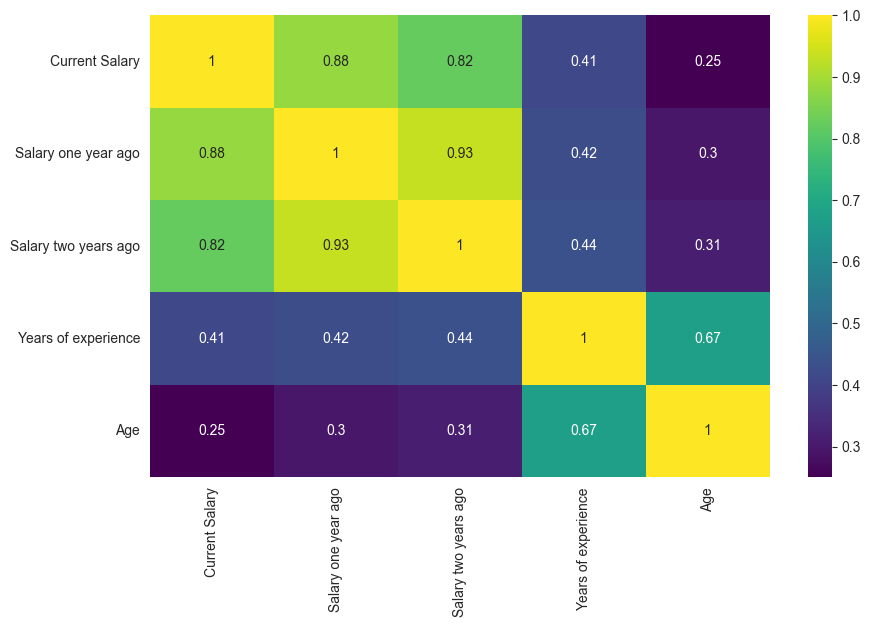

In [75]:
#Quality of correlation matrix
k = 14 #no.of columns
cols = df_2018.corr().nlargest(k, 'Current Salary')['Current Salary'].index
cm =df_2018[cols].corr()
plt.figure(figsize =(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

The current salary has a high positive correlation with the 'Salary one year ago' and 'Salary two years ago'